In [1]:
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


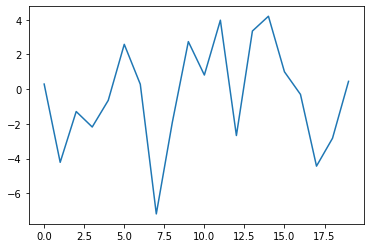

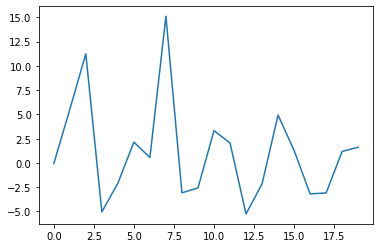

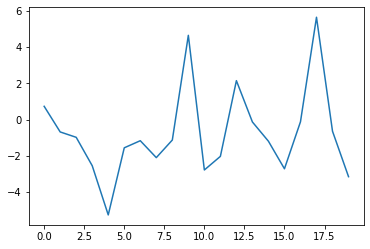

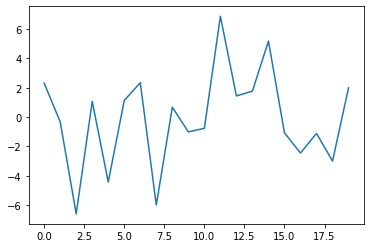

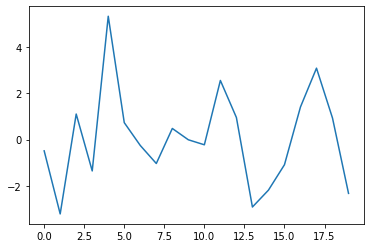

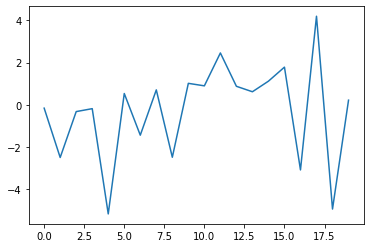

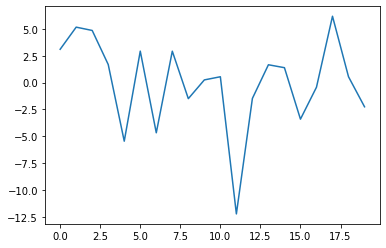

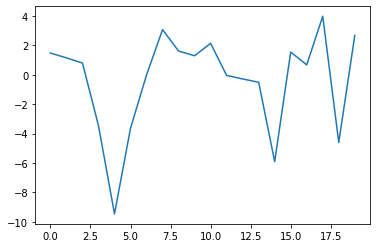

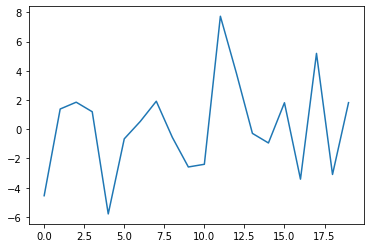

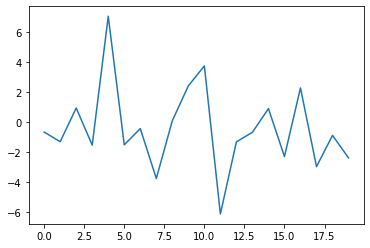

In [4]:
import matplotlib.pyplot as plt

for i in range(10):
  plt.figure()
  plt.plot(X[i])

In [5]:

# evaluate gradient boosting algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# define the model
model = GradientBoostingClassifier()
# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.899 (0.030)


In [6]:

# make predictions using gradient boosting for classification
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# define the model
model = GradientBoostingClassifier()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [0.2929949, -4.21223056, -1.288332, -2.17849815, -0.64527665, 2.58097719, 0.28422388, -7.1827928, -1.91211104, 2.73729512, 0.81395695, 3.96973717, -2.66939799, 3.34692332, 4.19791821, 0.99990998, -0.30201875, -4.43170633, -2.82646737, 0.44916808]
yhat = model.predict([row])
# summarize prediction
print('Predicted Class: %d' % yhat[0])

Predicted Class: 1


In [7]:
#Regression#

# test regression dataset
from sklearn.datasets import make_regression
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=7)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


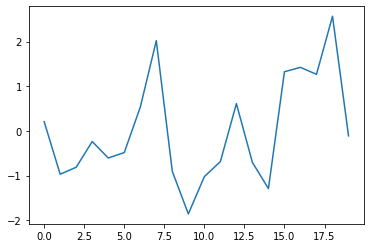

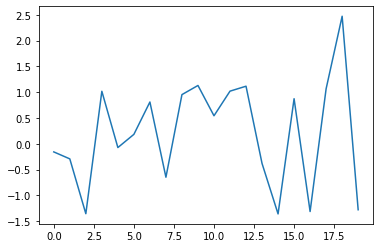

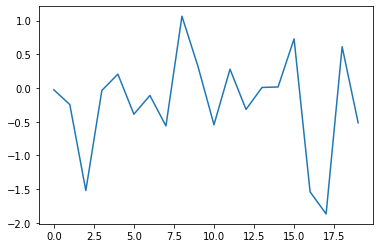

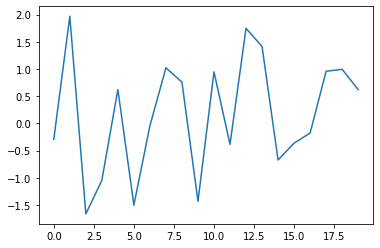

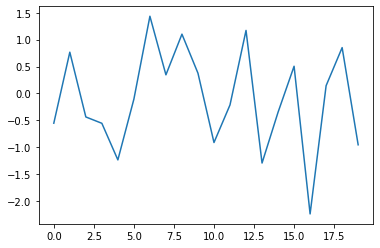

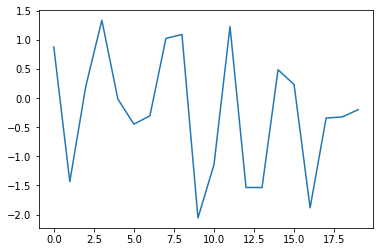

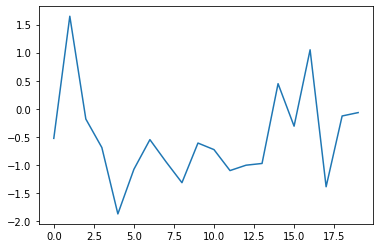

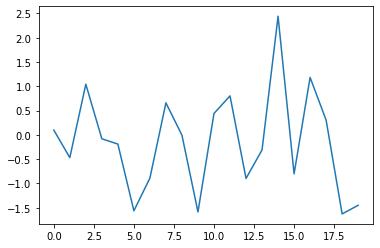

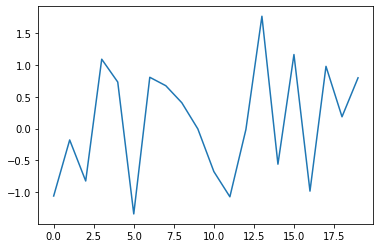

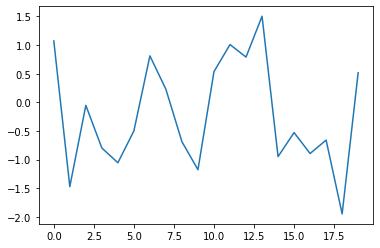

In [8]:
for i in range(10):
  plt.figure()
  plt.plot(X[i])

In [9]:

# evaluate gradient boosting ensemble for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=7)
# define the model
model = GradientBoostingRegressor()
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -62.426 (3.236)


In [10]:

# gradient boosting ensemble for making predictions for regression
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=7)
# define the model
model = GradientBoostingRegressor()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [0.20543991, -0.97049844, -0.81403429, -0.23842689, -0.60704084, -0.48541492, 0.53113006, 2.01834338, -0.90745243, -1.85859731, -1.02334791, -0.6877744, 0.60984819, -0.70630121, -1.29161497, 1.32385441, 1.42150747, 1.26567231, 2.56569098, -0.11154792]
yhat = model.predict([row])
# summarize prediction
print('Prediction: %d' % yhat[0])

Prediction: 37


>10 0.830 (0.037)
>50 0.879 (0.034)
>100 0.899 (0.030)
>500 0.919 (0.026)
>1000 0.919 (0.028)
>5000 0.921 (0.027)


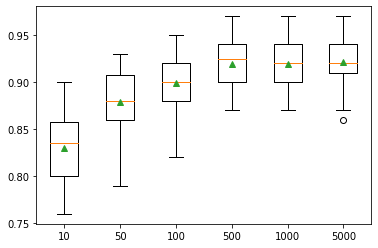

In [11]:
##Hyperparameter Optimization#


# explore gradient boosting number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
	return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	# define number of trees to consider
	n_trees = [10, 50, 100, 500, 1000, 5000]
	for n in n_trees:
		models[str(n)] = GradientBoostingClassifier(n_estimators=n)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()